In [2]:
#Import Statements
import numpy as np
import pandas as pd
import seaborn as sns

In [3]:
#Reading the two files
train_df = pd.read_csv('Data/training_data.csv')
final_test_df = pd.read_csv('Data/testing_data.csv')

In [4]:
#Splitting data from train.csv file in a 80-20 split 
from sklearn.model_selection import train_test_split
train_data, test_data = train_test_split(train_df, test_size = 0.2, 
                                         random_state = 1) 

In [5]:
#Training data fromm the split
train_data.shape

(712, 12)

In [6]:
train_data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
301,302,1,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.2500,NaN,Q
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,E36,C
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.5000,F33,S
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,NaN,S
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,NaN,S


In [7]:
train_data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [8]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 712 entries, 301 to 37
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  712 non-null    int64  
 1   Survived     712 non-null    int64  
 2   Pclass       712 non-null    int64  
 3   Name         712 non-null    object 
 4   Sex          712 non-null    object 
 5   Age          568 non-null    float64
 6   SibSp        712 non-null    int64  
 7   Parch        712 non-null    int64  
 8   Ticket       712 non-null    object 
 9   Fare         712 non-null    float64
 10  Cabin        165 non-null    object 
 11  Embarked     710 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 72.3+ KB


From using the .info method, we see that almost all columns have no missing values, however, Age, Cabin and Embarked have some missing values as they are not equal to 712 rows.

In [9]:
test_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 179 entries, 862 to 448
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  179 non-null    int64  
 1   Survived     179 non-null    int64  
 2   Pclass       179 non-null    int64  
 3   Name         179 non-null    object 
 4   Sex          179 non-null    object 
 5   Age          146 non-null    float64
 6   SibSp        179 non-null    int64  
 7   Parch        179 non-null    int64  
 8   Ticket       179 non-null    object 
 9   Fare         179 non-null    float64
 10  Cabin        39 non-null     object 
 11  Embarked     179 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 18.2+ KB


Similarly, From using the .info method, we see that almost all columns have no missing values, however, Age and Cabin have some missing values as they are not equal to 179 rows.

In [10]:
#Finding column statistics
train_data.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,712.000000,712.000000,712.000000,568.000000,712.000000,712.000000,712.000000
mean,442.119382,0.377809,2.300562,30.166232,0.494382,0.370787,31.951567
std,252.907306,0.485180,0.836643,14.856398,1.010478,0.775968,46.313942
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,225.750000,0.000000,2.000000,20.000000,0.000000,0.000000,7.895800
50%,442.500000,0.000000,3.000000,29.000000,0.000000,0.000000,14.458300
75%,657.250000,1.000000,3.000000,39.000000,1.000000,0.000000,30.695800
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


The .describe method gives us column statistics that help understand how the column data is distributed

Now to remove nan values from train_data

In [11]:
train_data = train_data.drop('Cabin', axis = 1)

I am first dropping the Cabin column as there are not enough values and many rows have missing data, which would make it difficult to make proper sense of it.

In [12]:
train_data[train_data.isnull().any(axis = 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
301,302,1,3,"McCoy, Mr. Bernard",male,NaN,2,0,367226,23.2500,Q
563,564,0,3,"Simmons, Mr. John",male,NaN,0,0,SOTON/OQ 392082,8.0500,S
613,614,0,3,"Horgan, Mr. John",male,NaN,0,0,370377,7.7500,Q
185,186,0,1,"Rood, Mr. Hugh Roscoe",male,NaN,0,0,113767,50.0000,S
274,275,1,3,"Healy, Miss. Hanora ""Nora""",female,NaN,0,0,370375,7.7500,Q
...,...,...,...,...,...,...,...,...,...,...,...
264,265,0,3,"Henry, Miss. Delia",female,NaN,0,0,382649,7.7500,Q
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0000,NaN
490,491,0,3,"Hagland, Mr. Konrad Mathias Reiersen",male,NaN,1,0,65304,19.9667,S
468,469,0,3,"Scanlan, Mr. James",male,NaN,0,0,36209,7.7250,Q


This is done to again see the individual rows in train_data that have any missing values. This way I can track how many rows of missing data are still available  

In [13]:
median_age = train_data["Age"].median()
mode_embarked = train_data['Embarked'].mode()
train_data["Age"].fillna(median_age, inplace=True)
train_data["Embarked"].fillna(mode_embarked[0], inplace=True)

By doing so I have replaced nan values in Age column with the median Age value and I have replaced the nan values in Embarked column with the modal value of Embarked column.

In [14]:
train_data[train_data.isnull().any(axis = 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


Now we have no rows with nan values in train_data.

We follow the same steps as before to again replace all nan values from the test_data

In [15]:
test_data = test_data.drop('Cabin', axis = 1)

In [16]:
test_data[test_data.isnull().any(axis = 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
223,224,0,3,"Nenkoff, Mr. Christo",male,NaN,0,0,349234,7.8958,S
680,681,0,3,"Peters, Miss. Katie",female,NaN,0,0,330935,8.1375,Q
241,242,1,3,"Murphy, Miss. Katherine ""Kate""",female,NaN,1,0,367230,15.5000,Q
17,18,1,2,"Williams, Mr. Charles Eugene",male,NaN,0,0,244373,13.0000,S
368,369,1,3,"Jermyn, Miss. Annie",female,NaN,0,0,14313,7.7500,Q
298,299,1,1,"Saalfeld, Mr. Adolphe",male,NaN,0,0,19988,30.5000,S
154,155,0,3,"Olsen, Mr. Ole Martin",male,NaN,0,0,Fa 265302,7.3125,S
181,182,0,2,"Pernot, Mr. Rene",male,NaN,0,0,SC/PARIS 2131,15.0500,C
180,181,0,3,"Sage, Miss. Constance Gladys",female,NaN,8,2,CA. 2343,69.5500,S
859,860,0,3,"Razi, Mr. Raihed",male,NaN,0,0,2629,7.2292,C


In [17]:
median_age_test = test_data["Age"].median()
median_fare_test = test_data['Fare'].median()
test_data["Age"].fillna(median_age_test, inplace=True)
test_data["Fare"].fillna(median_fare_test, inplace=True)

In [18]:
test_data[test_data.isnull().any(axis = 1)]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


Now all nan values have been successfully replaced so that we can continue with further data analysis.

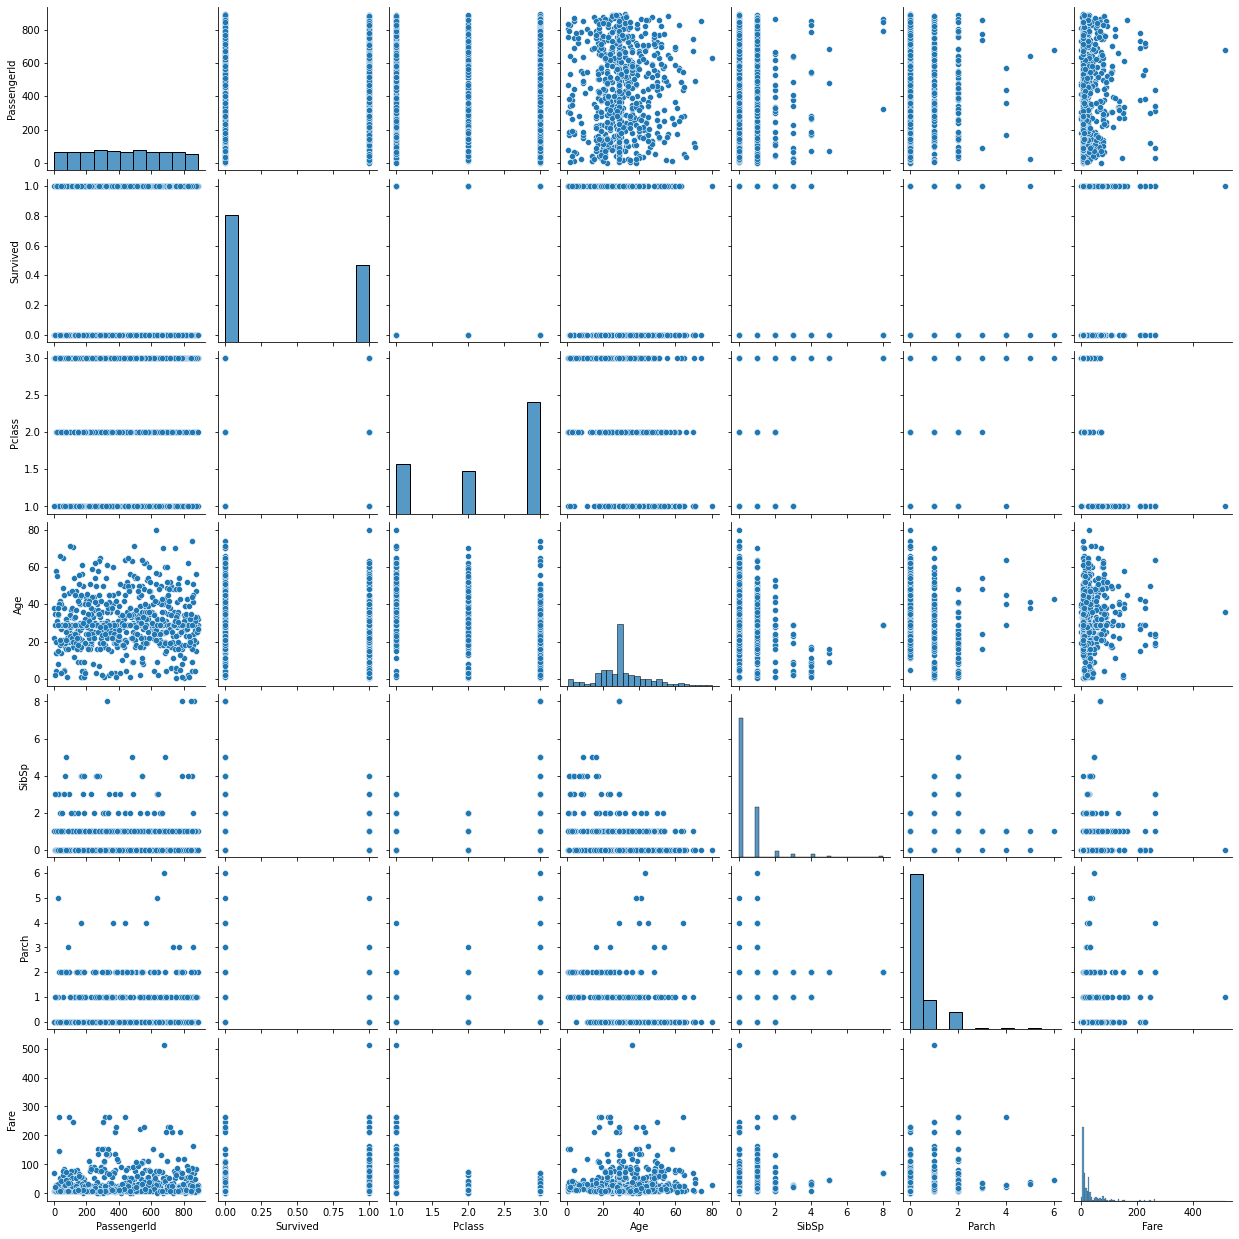

In [19]:
#Pairplots to see graphical relations between columns
sns.pairplot(train_data)

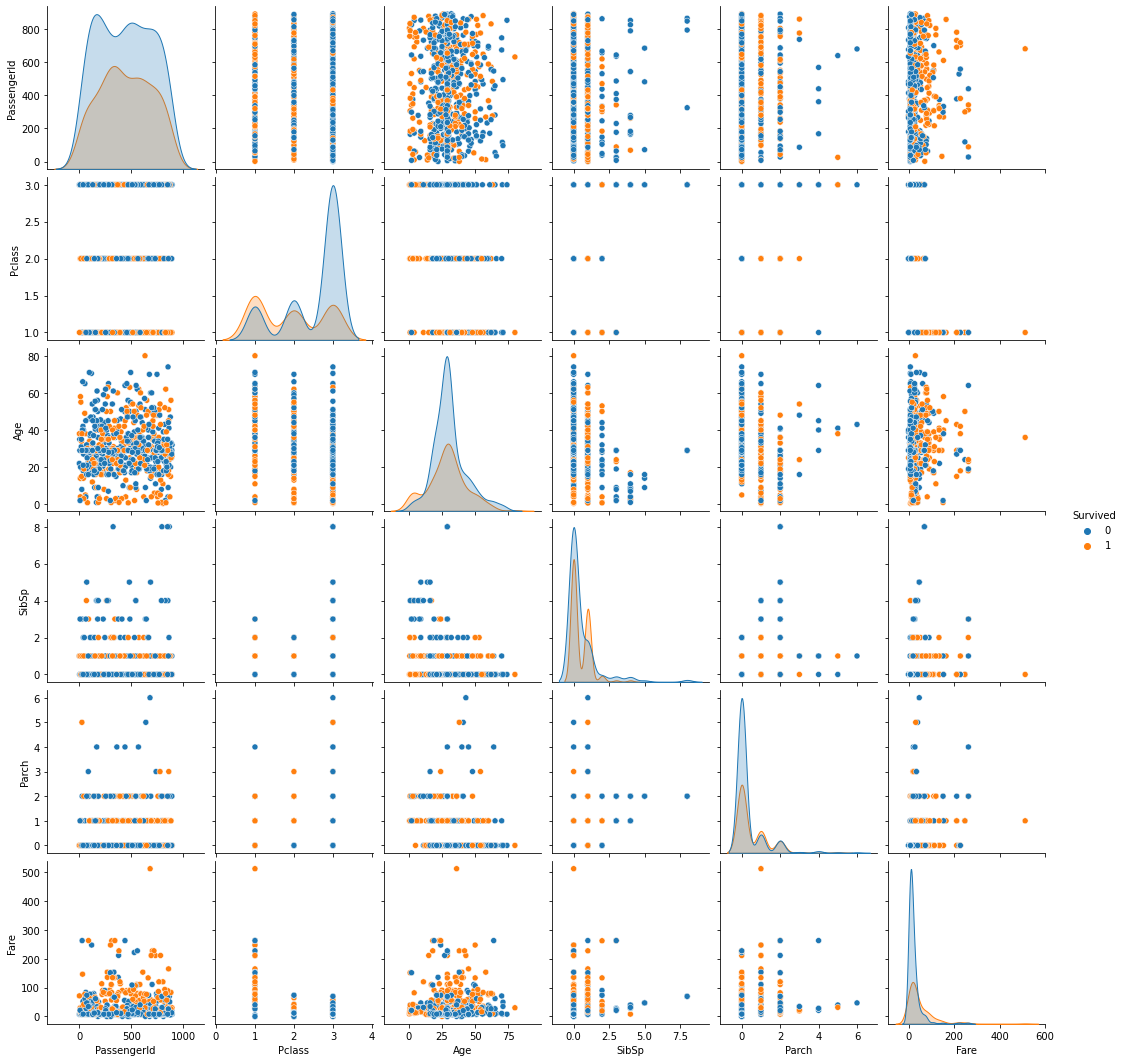

In [20]:
#2nd pairplot for graphical exploratory analysis where research column is a hue
sns.pairplot(train_data, hue='Survived')

From the graphical analysis, we can see very small amount of correlation to exist, which is hard to notice and ensure that it is statistically significant. However from the second pairplots it seems people who had higher fares, were in class 1, are more likely to have survived titanic crash.

In [21]:
#To find the correlation between different columns
results1 = train_data.corr() 

#To make it easy to read and remove duplicates.
results1 = results1.unstack()
results1 = results1.drop_duplicates().reset_index()

#Rename columns and remove rows with correlation values of 1
results1 = results1.rename(columns = {'level_0':'variable1', 
                                      'level_1':'variable2',
                                      0:'correlation'})
results1 = results1[results1['correlation'] < 1.0]

#Create new column with absolute values
results1["abs_correlation"] = abs(results1["correlation"])
results1

,variable1,variable2,correlation,abs_correlation
1,PassengerId,Survived,0.011759,0.011759
2,PassengerId,Pclass,-0.010021,0.010021
3,PassengerId,Age,0.029431,0.029431
4,PassengerId,SibSp,-0.011503,0.011503
5,PassengerId,Parch,0.011449,0.011449
6,PassengerId,Fare,0.008187,0.008187
7,Survived,Pclass,-0.356366,0.356366
8,Survived,Age,-0.060782,0.060782
9,Survived,SibSp,-0.020049,0.020049
10,Survived,Parch,0.113039,0.113039


This gives the correlations between all the columns to see if there are any columns with high correlation values

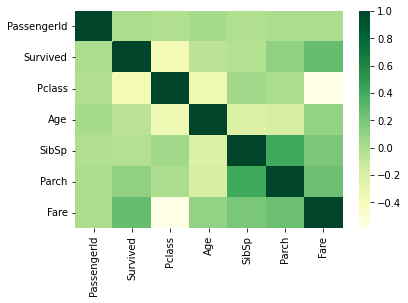

In [22]:
sns.heatmap(train_data.corr(), cmap='YlGn')

Heatmap to see the correlations. From the heatmap, it becomes clear that there does not exist high correaltions between different columns. Only Fare and Survived, and Parch and SibSp have some correlation. There is also negative correlation between Pclass and Survived which implies people in Class 1 had more chances of survivng compared to people in Class 3.

In [23]:
#For numercial exploratory analysis
import statsmodels
import statsmodels.formula.api as smf

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [24]:
#Creating OLS Regression to see prob(f-stat) and R square values and find linear regression values for different columns wrt. admit_chance
model0 = smf.ols("Survived ~ Pclass", data = train_data).fit()
model1 = smf.ols("Survived ~ Age", data = train_data).fit()
model2 = smf.ols("Survived ~ SibSp", data = train_data).fit()
model3 = smf.ols("Survived ~ Parch", data = train_data).fit()
model4 = smf.ols("Survived ~ Fare", data = train_data).fit()

model0.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.127
Model:                            OLS   Adj. R-squared:                  0.126
Method:                 Least Squares   F-statistic:                     103.3
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           9.57e-23
Time:                        15:29:42   Log-Likelihood:                -446.49
No. Observations:                 712   AIC:                             897.0
Df Residuals:                     710   BIC:                             906.1
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.8532      0.050     17.142      0.000       0.756       0.951
Pclass        -0.2067      0.020    -10.163      0.000      -0.247      -0.167
==============================================================================
Omnibus:                      497.887   Durbin-Watson:                   2.100
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               65.078
Skew:                           0.437   Prob(JB):                     7.39e-15
Kurtosis:                       1.804   Cond. No.                         8.24
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [25]:
model1.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.004
Model:                            OLS   Adj. R-squared:                  0.002
Method:                 Least Squares   F-statistic:                     2.633
Date:                Sat, 11 Jun 2022   Prob (F-statistic):              0.105
Time:                        15:29:43   Log-Likelihood:                -493.52
No. Observations:                 712   AIC:                             991.0
Df Residuals:                     710   BIC:                             1000.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.4443      0.045      9.913      0.000       0.356       0.532
Age           -0.0022      0.001     -1.623      0.105      -0.005       0.000
==============================================================================
Omnibus:                     3504.936   Durbin-Watson:                   2.161
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              118.980
Skew:                           0.503   Prob(JB):                     1.46e-26
Kurtosis:                       1.268   Cond. No.                         80.9
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [26]:
model2.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.000
Model:                            OLS   Adj. R-squared:                 -0.001
Method:                 Least Squares   F-statistic:                    0.2855
Date:                Sat, 11 Jun 2022   Prob (F-statistic):              0.593
Time:                        15:29:44   Log-Likelihood:                -494.70
No. Observations:                 712   AIC:                             993.4
Df Residuals:                     710   BIC:                             1003.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3826      0.020     18.887      0.000       0.343       0.422
SibSp         -0.0096      0.018     -0.534      0.593      -0.045       0.026
==============================================================================
Omnibus:                     3452.569   Durbin-Watson:                   2.143
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              120.403
Skew:                           0.503   Prob(JB):                     7.16e-27
Kurtosis:                       1.255   Cond. No.                         1.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [27]:
model3.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.013
Model:                            OLS   Adj. R-squared:                  0.011
Method:                 Least Squares   F-statistic:                     9.190
Date:                Sat, 11 Jun 2022   Prob (F-statistic):            0.00252
Time:                        15:29:45   Log-Likelihood:                -490.26
No. Observations:                 712   AIC:                             984.5
Df Residuals:                     710   BIC:                             993.7
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.3516      0.020     17.545      0.000       0.312       0.391
Parch          0.0707      0.023      3.031      0.003       0.025       0.116
==============================================================================
Omnibus:                     3662.228   Durbin-Watson:                   2.142
Prob(Omnibus):                  0.000   Jarque-Bera (JB):              113.842
Skew:                           0.491   Prob(JB):                     1.90e-25
Kurtosis:                       1.305   Cond. No.                         1.63
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

In [28]:
model4.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:               Survived   R-squared:                       0.073
Model:                            OLS   Adj. R-squared:                  0.072
Method:                 Least Squares   F-statistic:                     55.80
Date:                Sat, 11 Jun 2022   Prob (F-statistic):           2.36e-13
Time:                        15:29:46   Log-Likelihood:                -467.91
No. Observations:                 712   AIC:                             939.8
Df Residuals:                     710   BIC:                             949.0
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
Intercept      0.2875      0.021     13.502      0.000       0.246       0.329
Fare           0.0028      0.000      7.470      0.000       0.002       0.004
==============================================================================
Omnibus:                     6852.857   Durbin-Watson:                   2.134
Prob(Omnibus):                  0.000   Jarque-Bera (JB):               92.094
Skew:                           0.496   Prob(JB):                     1.00e-20
Kurtosis:                       1.544   Cond. No.                         68.3
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

From numerical exploratory analysis, we see that Survived has a correlation with 

1) Survived with Pclass have a R square value of 0.127 and prob(f-stat) of almost 0. This means there exists small positive correlation.

2) Survived with Age have a R square value of 0 and prob(f-stat) of almost 0.105 This means there exists no correlation and it is not statistically significant.

3) Survived with SibSp have a R square value of 0 and prob(f-stat) of almost 0.593. This means there exists no correlation and it is not statistically significant.

4) Survived with ParCh have a R square value of 0.013 and prob(f-stat) of almost 0. This means there exists very small positive correlation.

5) Survived with Fare have a R square value of 0.073 and prob(f-stat) of almost 0. This means there exists very small positive correlation.


In [29]:
train_data

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
301,302,1,3,"McCoy, Mr. Bernard",male,29.0,2,0,367226,23.2500,Q
309,310,1,1,"Francatelli, Miss. Laura Mabel",female,30.0,0,0,PC 17485,56.9292,C
516,517,1,2,"Lemore, Mrs. (Amelia Milley)",female,34.0,0,0,C.A. 34260,10.5000,S
120,121,0,2,"Hickman, Mr. Stanley George",male,21.0,2,0,S.O.C. 14879,73.5000,S
570,571,1,2,"Harris, Mr. George",male,62.0,0,0,S.W./PP 752,10.5000,S
...,...,...,...,...,...,...,...,...,...,...,...
715,716,0,3,"Soholt, Mr. Peter Andreas Lauritz Andersen",male,19.0,0,0,348124,7.6500,S
767,768,0,3,"Mangan, Miss. Mary",female,30.5,0,0,364850,7.7500,Q
72,73,0,2,"Hood, Mr. Ambrose Jr",male,21.0,0,0,S.O.C. 14879,73.5000,S
235,236,0,3,"Harknett, Miss. Alice Phoebe",female,29.0,0,0,W./C. 6609,7.5500,S


In [30]:
#Splitting training data into features and labels.
x_train = train_data.drop(['PassengerId', 'Survived', 'Name', 'Ticket'], axis = 1)
Y_train = train_data['Survived']

#Splitting testing data into features and labels
x_test = test_data.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)
Y_test = test_data['Survived']

In [31]:
x_train

,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
301,3,male,29.0,2,0,23.2500,Q
309,1,female,30.0,0,0,56.9292,C
516,2,female,34.0,0,0,10.5000,S
120,2,male,21.0,2,0,73.5000,S
570,2,male,62.0,0,0,10.5000,S
...,...,...,...,...,...,...,...
715,3,male,19.0,0,0,7.6500,S
767,3,female,30.5,0,0,7.7500,Q
72,2,male,21.0,0,0,73.5000,S
235,3,female,29.0,0,0,7.5500,S


In [32]:
x_test

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
862,1,1,female,48.0,0,0,25.9292,S
223,0,3,male,27.0,0,0,7.8958,S
84,1,2,female,17.0,0,0,10.5000,S
680,0,3,female,27.0,0,0,8.1375,Q
535,1,2,female,7.0,0,2,26.2500,S
...,...,...,...,...,...,...,...,...
796,1,1,female,49.0,0,0,25.9292,S
815,0,1,male,27.0,0,0,0.0000,S
629,0,3,male,27.0,0,0,7.7333,Q
421,0,3,male,21.0,0,0,7.7333,Q


In [33]:
Y_test

862    1
223    0
84     1
680    0
535    1
      ..
796    1
815    0
629    0
421    0
448    1
Name: Survived, Length: 179, dtype: int64

In [34]:
#Import statments to convert ordinal and categorical data and create pipeline
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler #(mean 0 and sd 1)

num_pipeline = Pipeline([('std_scaler', StandardScaler())])

In [35]:
from sklearn.compose import ColumnTransformer

#For numerical variables
num_attribs = ['Age', 'SibSp', 'Parch', 'Fare']

#For categorical variables
cat_attribs = ["Sex", "Embarked"]

#For ordinal variables
ord_attribs = ["Pclass"]

#Updating the pipeline 
full_pipeline = ColumnTransformer([                          
        ("num", num_pipeline, num_attribs),
        ("cat", OneHotEncoder(), cat_attribs),
        ("ord", OrdinalEncoder(), ord_attribs),
    ])

#Modifying training data to fit the pipeline 
x_train_prepared = full_pipeline.fit_transform(x_train)
x_test_prepared = full_pipeline.fit_transform(x_test)

Now we have all our data in numerical variables format so that we can create predictive models and test accuracy. I am going to use musltiple different ML classification models and compare accuracy values to find the model that best fits the data and predicts with highest accuracy value.

In [36]:
x_train_prepared.shape, x_test_prepared.shape

((712, 10), (179, 10))

In [37]:
x_train_prepared

array([[-0.0701322 ,  1.49105341, -0.478173  , ...,  1.        ,
         0.        ,  2.        ],
       [ 0.00524917, -0.48959963, -0.478173  , ...,  0.        ,
         0.        ,  0.        ],
       [ 0.30677464, -0.48959963, -0.478173  , ...,  0.        ,
         1.        ,  1.        ],
       ...,
       [-0.67318314, -0.48959963, -0.478173  , ...,  0.        ,
         1.        ,  1.        ],
       [-0.0701322 , -0.48959963, -0.478173  , ...,  0.        ,
         1.        ,  2.        ],
       [-0.67318314, -0.48959963, -0.478173  , ...,  0.        ,
         1.        ,  2.        ]])

In [38]:
#Running Naive Bayes and making predictions
from sklearn.naive_bayes import GaussianNB

model = GaussianNB()
model.fit(x_train_prepared, Y_train)
# make predictions for test data
y_pred = model.predict(x_test_prepared)
predictions = y_pred 


In [39]:
predictions

array([1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0,
       1, 0, 1, 0, 1, 1, 0, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 1, 1, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1,
       0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0,
       1, 1, 1, 1, 1, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1, 0, 1, 0,
       0, 0, 1])

In [40]:
# evaluate predictions and checking accuracy value
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report, confusion_matrix
accuracy = accuracy_score(Y_test, predictions)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

from sklearn.metrics import classification_report, confusion_matrix
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))


Accuracy: 78.21%
[[87 19]
 [20 53]]
              precision    recall  f1-score   support

           0       0.81      0.82      0.82       106
           1       0.74      0.73      0.73        73

    accuracy                           0.78       179
   macro avg       0.77      0.77      0.77       179
weighted avg       0.78      0.78      0.78       179



In [41]:
#Running Logistic Regression and evaluation predictions and checking accuracy value
from sklearn.linear_model import LogisticRegression
model = LogisticRegression(solver='liblinear',multi_class="auto")
model.fit(x_train_prepared, Y_train)
y_pred = model.predict(x_test_prepared)

print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

0.7877094972067039
[[89 17]
 [21 52]]
              precision    recall  f1-score   support

           0       0.81      0.84      0.82       106
           1       0.75      0.71      0.73        73

    accuracy                           0.79       179
   macro avg       0.78      0.78      0.78       179
weighted avg       0.79      0.79      0.79       179



In [42]:
#Running Support Vector Machines and evaluation predictions and checking accuracy value
from sklearn import svm
model = svm.SVC(gamma="scale",kernel="rbf")
model.fit(x_train_prepared, Y_train)
y_pred = model.predict(x_test_prepared)

print(accuracy_score(Y_test, y_pred))
print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

0.7988826815642458
[[95 11]
 [25 48]]
              precision    recall  f1-score   support

           0       0.79      0.90      0.84       106
           1       0.81      0.66      0.73        73

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.78       179
weighted avg       0.80      0.80      0.79       179



In [43]:
#Running Decision Tree and evaluation predictions and checking accuracy value
from sklearn.tree import DecisionTreeClassifier

model = DecisionTreeClassifier(
    random_state=3, 
    criterion='entropy',
    splitter='best', 
    max_depth=5, 
    min_samples_split=2)

model.fit(x_train_prepared,Y_train)

y_pred = model.predict(x_test_prepared)

# evaluate predictions
accuracy = model.score(x_test_prepared, Y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 78.21%


In [44]:
accuracy = accuracy_score(Y_test, y_pred)
print(accuracy)

print(confusion_matrix(Y_test, y_pred))
print(classification_report(Y_test, y_pred))

0.7821229050279329
[[91 15]
 [24 49]]
              precision    recall  f1-score   support

           0       0.79      0.86      0.82       106
           1       0.77      0.67      0.72        73

    accuracy                           0.78       179
   macro avg       0.78      0.76      0.77       179
weighted avg       0.78      0.78      0.78       179



In [45]:
#Running RandomForest and evaluation predictions and checking accuracy value

seed = 42

from sklearn.ensemble import RandomForestClassifier

model = RandomForestClassifier(
    n_estimators=150,
    random_state=seed, 
    criterion='entropy',
    max_depth=None, 
    min_samples_split=2)

model.fit(x_train_prepared,Y_train)

y_pred = model.predict(x_test_prepared)

# evaluate predictions
accuracy = model.score(x_test_prepared, Y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 81.56%


In [46]:
#Running AdaBoost Classifier and evaluation predictions and checking accuracy value

seed = 42

from sklearn.ensemble import AdaBoostClassifier

model = AdaBoostClassifier(
    n_estimators=150,
    random_state=seed)

model.fit(x_train_prepared,Y_train)

y_pred = model.predict(x_test_prepared)

# evaluate predictions
accuracy = model.score(x_test_prepared, Y_test)
print("Accuracy: %.2f%%" % (accuracy * 100.0))

Accuracy: 77.09%


I used 6 different ML classification techniques and found that for my data, RandomForrest provides the highest accuracy value of 81.56%. Thus, I will use RandomForrets to make predictions for test.csv data file.

In [47]:
from sklearn.ensemble import VotingClassifier
from sklearn.metrics import precision_score, recall_score, confusion_matrix, classification_report,accuracy_score, f1_score

# choose 3 models to be put in the voting classifier
clf1 = GaussianNB()
clf2 = LogisticRegression(solver='liblinear',multi_class="auto")
clf3 = svm.SVC(gamma="scale",kernel="rbf")
clf4 = DecisionTreeClassifier(random_state=3, criterion='entropy',splitter='best', max_depth=5, min_samples_split=2)
clf5 = RandomForestClassifier(n_estimators=150, random_state=seed, criterion='entropy', max_depth=None, min_samples_split=2)
clf6 = AdaBoostClassifier(n_estimators=150,random_state=seed)


vclf = VotingClassifier(estimators=[('gnb', clf1), ('clf2', clf2), ('clf3', clf3), ('dtc', clf4), ('rf', clf5), ('clf6', clf6), ], voting='hard')

vclf.fit(x_train_prepared, Y_train)
y_predictions = vclf.predict(x_test_prepared)
y_predictions
accuracy = vclf.score(x_test_prepared, Y_test)

print(classification_report(Y_test, y_predictions))
print("Accuracy: %.2f%%" % (accuracy * 100.0))

              precision    recall  f1-score   support

           0       0.80      0.89      0.84       106
           1       0.80      0.67      0.73        73

    accuracy                           0.80       179
   macro avg       0.80      0.78      0.79       179
weighted avg       0.80      0.80      0.80       179

Accuracy: 79.89%


Steps to make predictions for test.csv file

In [ ]:
final_test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


From using the .info method, we see that almost all columns have no missing values, however, Age, Cabin and Fare have some missing values as they are not equal to 418 rows.

Now as done previously in the jupyter notebook, I will replace nan values in test.csv file using similar methods

In [ ]:
final_test_df= final_test_df.drop('Cabin', axis = 1)

In [ ]:
final_test_df[final_test_df.isnull().any(axis = 1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
10,902,3,"Ilieff, Mr. Ylio",male,NaN,0,0,349220,7.8958,S
22,914,1,"Flegenheim, Mrs. Alfred (Antoinette)",female,NaN,0,0,PC 17598,31.6833,S
29,921,3,"Samaan, Mr. Elias",male,NaN,2,0,2662,21.6792,C
33,925,3,"Johnston, Mrs. Andrew G (Elizabeth Lily"" Watson)""",female,NaN,1,2,W./C. 6607,23.4500,S
36,928,3,"Roth, Miss. Sarah A",female,NaN,0,0,342712,8.0500,S
...,...,...,...,...,...,...,...,...,...,...
408,1300,3,"Riordan, Miss. Johanna Hannah""""",female,NaN,0,0,334915,7.7208,Q
410,1302,3,"Naughton, Miss. Hannah",female,NaN,0,0,365237,7.7500,Q
413,1305,3,"Spector, Mr. Woolf",male,NaN,0,0,A.5. 3236,8.0500,S
416,1308,3,"Ware, Mr. Frederick",male,NaN,0,0,359309,8.0500,S


This is to see the number of rows with nan values

In [ ]:
median_age_final_test = final_test_df["Age"].median()
median_fare_final_test = final_test_df['Fare'].median()
final_test_df["Age"].fillna(median_age_final_test, inplace=True)
final_test_df["Fare"].fillna(median_fare_final_test, inplace=True)

By doing so I have replaced nan values in Age column with the median Age value and I have replaced the nan values in Fare column with the median value of Fare column.

In [ ]:
final_test_df[final_test_df.isnull().any(axis = 1)]

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked


Now we see that there are no rows in final_test_df that have nan values and we can move forward with creating our predictions.

In [ ]:
final_test_df.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,S


In [ ]:
final = final_test_df.drop(['PassengerId', 'Name', 'Ticket'], axis = 1)

In [ ]:
#To convert ordinal and categorical data and create pipeline
final_prepared = full_pipeline.fit_transform(final)

Now we have fitted final_test_df to our pipelline so that all columns have numerical va;ue whihc will allow us to make predictions.

In [ ]:
final_prepared.shape

(418, 10)

In [ ]:
#Running RandomForest and creating predictions

seed = 42

from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier

model = RandomForestClassifier(
    n_estimators=150,
    random_state=seed, 
    criterion='entropy',
    max_depth=None, 
    min_samples_split=2)

model.fit(x_train_prepared,Y_train)

y_pred = model.predict(final_prepared)
y_pred

array([0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1,
       1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1,
       1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1,
       1, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0,
       1, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0,
       0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 1, 0, 0, 1, 0, 1, 0, 0, 1, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 1, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 1,
       1, 1, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 0, 1, 0, 1, 0,
       1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1,

We now have our predictions for passenges who are in test.csv file

In [ ]:
#To create a datafram in the correct format as described in the question
df = pd.DataFrame(y_pred)
df = df.reset_index()
df['PassengerId'] = 892 + df['index']
df['Survived'] = df[0]
df = df[['PassengerId', 'Survived']]
df

#Saving dataframe to csv file to submit to kaggle
df.to_csv('submission.csv', index=False)

We have created the file that needs to be submitted to check out Prediction's success.